- Read in the dataset.
- Drop 'PID' & 'Order' values as they do not count towards valuations.
- Examine the dataset.
- Set target_var='SalePrice'

In [ ]:
'''
"CodeBlock 1"

Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'
'''
! pwd 
! ls -al
import pandas as pd
import numpy as np

#https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

# drop ORDER & PID
df_orig = pd.read_csv('AmesHousing.csv')
df_orig.drop(['PID','Order'], axis=1, inplace=True)
df_orig.head()
target_var='SalePrice'
rows, cols = df_orig.shape
print(f"Rows: {rows}, Columns: {cols}")
# Identify missing values
missing_values = df_orig.isnull().sum()
count_missing=len(np.where(df_orig.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
df_orig.head()



/Users/r.cunningham/Desktop/PgCert/university_assignment_2025
total 10600
drwxr-xr-x@ 18 r.cunningham  staff      576 Apr  7 14:47 .
drwxr-xr-x@  8 r.cunningham  staff      256 Apr  7 14:47 ..
-rw-r--r--@  1 r.cunningham  staff     6148 Apr  6 11:56 .DS_Store
drwxr-xr-x@ 14 r.cunningham  staff      448 Apr  1 18:10 .git
-rw-rw-r--   1 r.cunningham  staff   963738 Mar 30 20:13 AmesHousing.csv
drwxr-xr-x@  5 r.cunningham  staff      160 Apr  5 16:12 Outliers
-rw-r--r--   1 r.cunningham  staff      136 Apr  6 21:55 README.md
-rw-r--r--   1 r.cunningham  staff    73384 Apr  5 15:32 Sat_aft.ipynb
drwxr-xr-x@  8 r.cunningham  staff      256 Apr  1 18:09 archive
-rw-r--r--   1 r.cunningham  staff   725601 Apr  7 14:05 assignment_gold.ipynb
-rw-r--r--   1 r.cunningham  staff   381801 Apr  7 14:47 assignment_gold_monday.ipynb
-rw-r--r--   1 r.cunningham  staff  1026563 Apr  5 18:49 assignment_with_k2.ipynb
-rw-r--r--   1 r.cunningham  staff   973975 Apr  6 20:04 assignment_with_k2_sat_evening.i

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Get a list of categorical and numeric columns to aid later encoding.

- train_df.dtypes → Returns the data type of each column.
- train_df.dtypes != "object" → Filters numerical columns (int64, float64).
- train_df.dtypes == "object" → Filters categorical columns (object data type).
- .tolist() → Converts the column index to a list for easier use.

In [2]:
'''
"CodeBlock Get Numerical and Categorical"
Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'
'''

numerical_df = df_orig.dtypes[df_orig.dtypes != "object"].index
numerical_column_names=numerical_df.to_list()
categorical_df = df_orig.dtypes[df_orig.dtypes == "object"].index
categorical_column_names=categorical_df.to_list()
print('\nNumerical Columns:')
print(numerical_column_names)
print('\nCategorical Columns:')
print(categorical_column_names)


Numerical Columns:
['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

Categorical Columns:
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating 

Correlation heatmap of numeric features

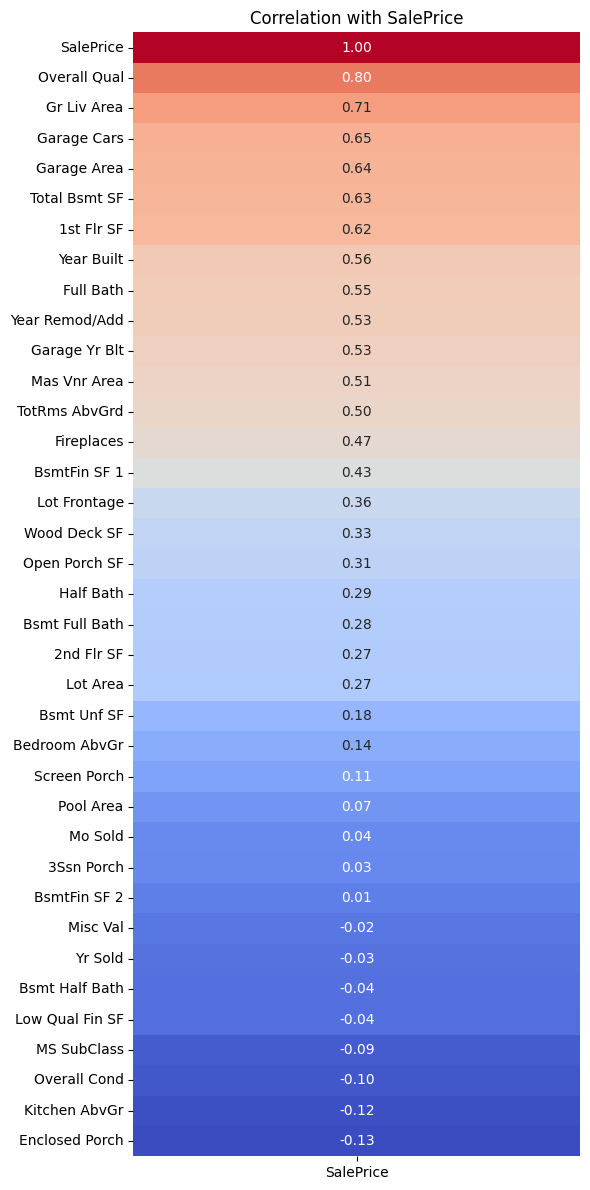

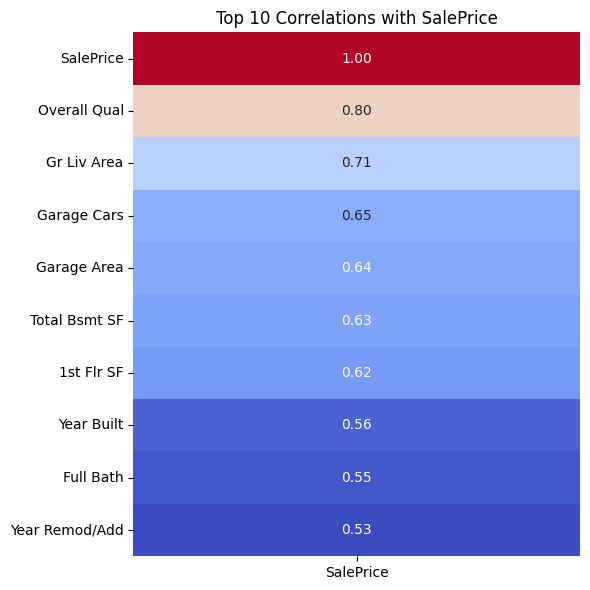

            Feature  Correlation
0    Enclosed Porch    -0.128787
1     Kitchen AbvGr    -0.119814
2      Overall Cond    -0.101697
3       MS SubClass    -0.085092
4   Low Qual Fin SF    -0.037660
5    Bsmt Half Bath    -0.035835
6           Yr Sold    -0.030569
7          Misc Val    -0.015691
8      BsmtFin SF 2     0.005891
9        3Ssn Porch     0.032225
10          Mo Sold     0.035259
11        Pool Area     0.068403
12     Screen Porch     0.112151
13    Bedroom AbvGr     0.143913
14      Bsmt Unf SF     0.182855
Enclosed Porch
Kitchen AbvGr
Overall Cond
MS SubClass
Low Qual Fin SF
Bsmt Half Bath
Yr Sold
Misc Val
BsmtFin SF 2
3Ssn Porch
Mo Sold
Pool Area
Screen Porch
Bedroom AbvGr
Bsmt Unf SF


In [3]:
'''
"CodeBlock HEATMAP"
Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'(str)
would_drop_list=List of features with low correlation to target_var
'''


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute correlation matrix
corr_matrix = df_orig.corr(numeric_only=True)

# Step 2: Select and sort by correlation with SalePrice
saleprice_corr = corr_matrix[["SalePrice"]].sort_values(by="SalePrice", ascending=False)

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 12))
sns.heatmap(saleprice_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Correlation with SalePrice")
plt.tight_layout()
plt.show()
top_corr = saleprice_corr.head(10)
plt.figure(figsize=(6, 6))
sns.heatmap(top_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Top 10 Correlations with SalePrice")
plt.tight_layout()
plt.show()
# Compute correlation matrix (numeric features only)
corr_matrix = df_orig.corr(numeric_only=True)

# Extract correlation with SalePrice
saleprice_corr = corr_matrix["SalePrice"]

# Get features with weak correlation (absolute value < 0.2)
low_corr_features = saleprice_corr[abs(saleprice_corr) < 0.2].sort_values()

# Display as a DataFrame
low_corr_features_df = low_corr_features.reset_index()
low_corr_features_df.columns = ["Feature", "Correlation"]
print(low_corr_features_df)

# Create list of potential features to drop
would_drop_list= low_corr_features.drop("SalePrice", errors="ignore").index.tolist()
for item in would_drop_list:
    print(item)


Here we see the SalePrice descriptive statistics. 

The mean is greater than the median which can indicate a positive or 
right skewededness. We can confirm this by visualizing the data.

We will look for outliers

False
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


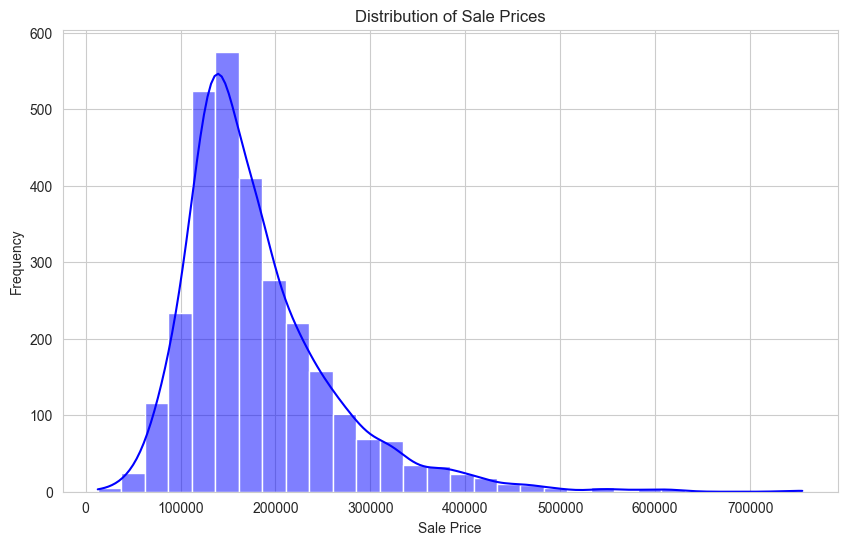

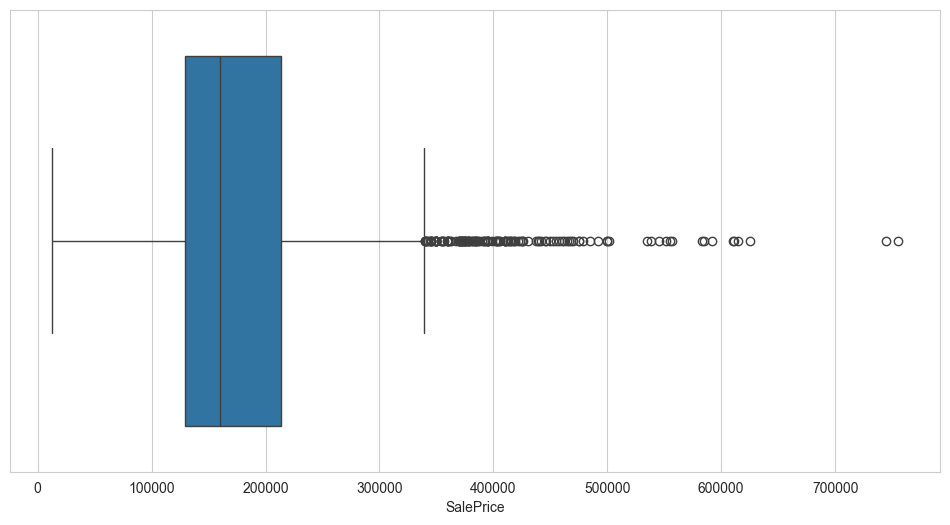

Number of outliers: 137


In [4]:
'''

"CodeBlock  SHOW_OUTLIERS"

Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'
'''

target_var='SalePrice'
transform=False
print(df_orig['SalePrice'].isnull().any())
print(df_orig['SalePrice'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_orig['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


def show_outliers(df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df["SalePrice"])
    plt.show()


    Q1 = df["SalePrice"].quantile(0.25)
    Q3 = df["SalePrice"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df["SalePrice"] < lower_bound) | (df["SalePrice"] > upper_bound)]
    print(f"Number of outliers: {len(outliers)}")
show_outliers(df_orig)

See how to handle outliers

In [5]:
'''
"CodeBlock SHOW_OUTLIERS2"  

Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'
outliers=outlier properties, dataframe
'''
Q1 = df_orig["SalePrice"].quantile(0.25)
Q3 = df_orig["SalePrice"].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR

# Filter outliers
outliers = df_orig[df_orig["SalePrice"] > upper_whisker]

rows, cols = df_orig.shape
print(f"Total Rows: {rows}, Columns: {cols}")
print(outliers["Neighborhood"].value_counts())

print(outliers["Overall Qual"].value_counts())

Total Rows: 2930, Columns: 80
Neighborhood
NridgHt    62
StoneBr    22
NoRidge    21
Timber      8
Somerst     8
CollgCr     5
Crawfor     5
Veenker     2
NAmes       1
Gilbert     1
OldTown     1
Edwards     1
Name: count, dtype: int64
Overall Qual
9     60
8     48
10    25
7      3
6      1
Name: count, dtype: int64


See Average sale price per area

/var/folders/r1/hp5_t9m54pjfz3ymsmkxcltc0000gp/T/ipykernel_51562/3220213978.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values, palette="viridis")


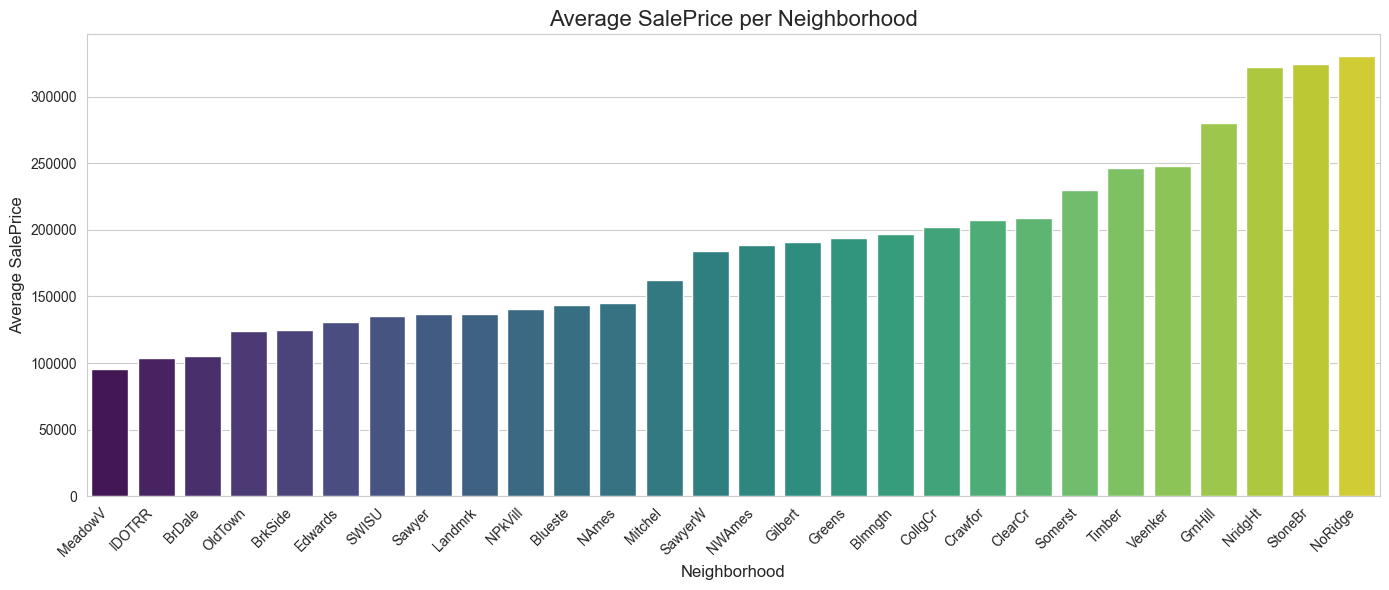

   Neighborhood  Average_SalePrice
0       NoRidge      330319.126761
1       StoneBr      324229.196078
2       NridgHt      322018.265060
3       GrnHill      280000.000000
4       Veenker      248314.583333
5        Timber      246599.541667
6       Somerst      229707.324176
7       ClearCr      208662.090909
8       Crawfor      207550.834951
9       CollgCr      201803.434457
10      Blmngtn      196661.678571
11       Greens      193531.250000
12      Gilbert      190646.575758
13       NWAmes      188406.908397
14      SawyerW      184070.184000
15      Mitchel      162226.631579
16        NAmes      145097.349887
17      Blueste      143590.000000
18      NPkVill      140710.869565
19      Landmrk      137000.000000
20       Sawyer      136751.152318
21        SWISU      135071.937500
22      Edwards      130843.381443
23      BrkSide      124756.250000
24      OldTown      123991.891213
25       BrDale      105608.333333
26       IDOTRR      103752.903226
27      MeadowV     

In [6]:
'''
"CodeBlock AVG_SL_PRICE_PER_AREA"  

Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'
outliers=outlier properties, dataframe
'''
df=df_orig.copy()
# Group by Neighborhood and calculate mean SalePrice
avg_price_by_neighborhood = df.groupby("Neighborhood")["SalePrice"].mean().sort_values()

# Create a barplot
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values, palette="viridis")

# Customize the chart
plt.title("Average SalePrice per Neighborhood", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Average SalePrice", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Group by Neighborhood and compute the mean SalePrice
avg_price_by_neighborhood = df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False)

# Convert to DataFrame (optional for display)
avg_price_table = avg_price_by_neighborhood.reset_index()
avg_price_table.columns = ["Neighborhood", "Average_SalePrice"]

# Show the table
print(avg_price_table)

Handle missing values

In [8]:
'''
"CodeBlock HANDLE_MISSING"  

df=df_orig.copy()
Created df_cleaned
Vars:
target_var='SalePrice'
outliers=outlier properties, dataframe
'''
# Identify missing values
df=df=df_orig.copy()
missing_values = df.isnull().sum()
count_missing=len(np.where(df.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Create a DataFrame with missing count and percentage
missing_values_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': (missing_values.values / len(df_orig)) * 100
})

# Sort by highest missing percentage
missing_values_df = missing_values_df.sort_values(by='Missing Percentage', ascending=False)

# Display the result
print(missing_values_df)

rows, cols = df_orig.shape
print(f"Rows: {rows}, Columns: {cols}")
def do_drop(df):
    threshold = 0.80  # 80%
    cols_to_drop = missing_values_df[missing_values_df['Missing Percentage'] > (threshold * 100)]['Column'].tolist()
    print(f"Columns to drop: {cols_to_drop}")
    df_cleaned = df.drop(columns=cols_to_drop)
    return df_cleaned

def do_impute(df):
    # Impute missing values
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical columns
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # Numeric columns
            df[col].fillna(df[col].mean(), inplace=True)
    return df

drop=False

if drop:
    df=do_drop(df)
df_cleaned=do_impute(df)


# Identify missing values
missing_values = df_cleaned.isnull().sum()
count_missing=len(np.where(df_orig.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
rows, cols = df_cleaned.shape
print(f"Rows: {rows}, Columns: {cols}")

# RETURN df_cleaned



There are 15749 empty values in the dataframe.
            Column  Missing Count  Missing Percentage
24         Pool QC           2917           99.556314
26    Misc Feature           2824           96.382253
1            Alley           2732           93.242321
25           Fence           2358           80.477816
2     Mas Vnr Type           1775           60.580205
16    Fireplace Qu           1422           48.532423
0     Lot Frontage            490           16.723549
23     Garage Cond            159            5.426621
22     Garage Qual            159            5.426621
19   Garage Finish            159            5.426621
18   Garage Yr Blt            159            5.426621
17     Garage Type            157            5.358362
6    Bsmt Exposure             83            2.832765
9   BsmtFin Type 2             81            2.764505
5        Bsmt Cond             80            2.730375
4        Bsmt Qual             80            2.730375
7   BsmtFin Type 1             80  

/var/folders/r1/hp5_t9m54pjfz3ymsmkxcltc0000gp/T/ipykernel_51562/2503998878.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/r1/hp5_t9m54pjfz3ymsmkxcltc0000gp/T/ipykernel_51562/2503998878.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Add synthetic data

In [136]:
'''
"CodeBlock SYNTH"  

df=df_cleaned.copy()
Created df_with_synthetics
Vars:
target_var='SalePrice'
outliers=outlier properties, dataframe
'''
import json
df=df_cleaned.copy()
df["is_synthetic"] = 0

# Get numeric median values to simulate a typical home
baseline = df.select_dtypes(include="number").median()

# Create two synthetic rows
synthetic_low = baseline.copy()
synthetic_high = baseline.copy()

# Find neighborhoods with lowest and highest average prices:
neigh_prices = df.groupby("Neighborhood")["SalePrice"].mean()
lowest_neigh = neigh_prices.idxmin()
highest_neigh = neigh_prices.idxmax()

synthetic_low["Neighborhood"] = lowest_neigh
synthetic_high["Neighborhood"] = highest_neigh

# Optional: Add default values for categorical features
for col in df.select_dtypes(include="object").columns:
    if col != "Neighborhood":
        mode = df[col].mode()[0]
        synthetic_low[col] = mode
        synthetic_high[col] = mode

#  Combine into a DataFrame
synthetic_df = pd.DataFrame([synthetic_low, synthetic_high])
synthetic_df["is_synthetic"] = 1  # Flag them

df_with_synthetics = pd.concat([df, synthetic_df], ignore_index=True)
synthetic_df.head()
row_0_n=synthetic_df.iloc[0]['Neighborhood']
row_1_n=synthetic_df.iloc[1]['Neighborhood']
info = f"""
Two "test case" homes, one in each extreme neighborhood

All features identical except Neighborhood

- row 0 Neighborhood = {row_0_n}
- row 1 Neighborhood = {row_1_n}
"""
synth_data={
  0: {
    'orig_neighborhood': synthetic_df.iloc[0]['Neighborhood'],
    'sale_price': synthetic_df.iloc[0]['SalePrice']
  },
  1: {
    'orig_neighborhood': synthetic_df.iloc[1]['Neighborhood'],
    'sale_price': synthetic_df.iloc[1]['SalePrice']
  }
}
print(info)
print(synthetic_df.SalePrice)

json_synth_data = json.dumps(synth_data, indent=4)  # indent for pretty printing
print('Synth data:')
print(json_synth_data)




Two "test case" homes, one in each extreme neighborhood

All features identical except Neighborhood

- row 0 Neighborhood = MeadowV
- row 1 Neighborhood = NoRidge

0    160000.0
1    160000.0
Name: SalePrice, dtype: float64
Synth data:
{
    "0": {
        "orig_neighborhood": "MeadowV",
        "sale_price": 160000.0
    },
    "1": {
        "orig_neighborhood": "NoRidge",
        "sale_price": 160000.0
    }
}


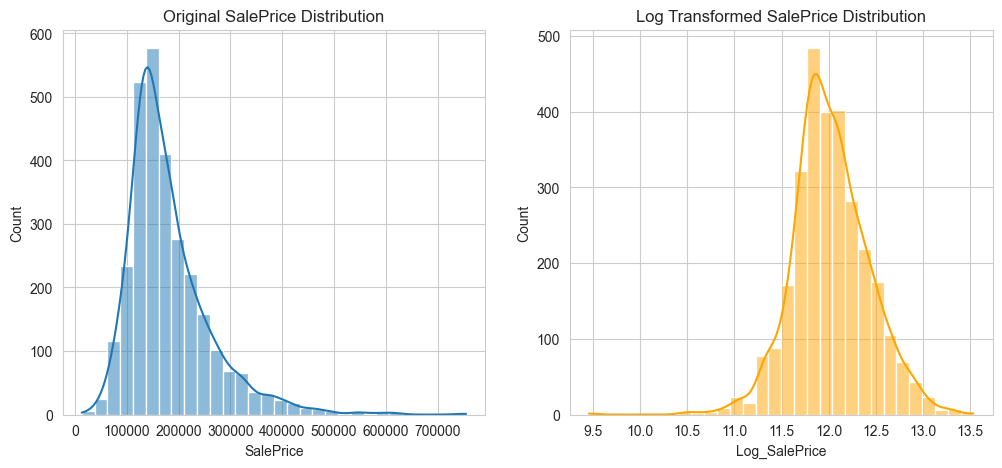

Target var = Log_SalePrice


In [10]:
'''
"CodeBlock TRANSFORM SALES"  

Using df=df_with_synthetics.copy()
Created df_log_transformed - with the SalePrice log transformed to Log_SalePrice
Vars:
target_var='SalePrice', string
outliers=outlier properties, dataframe
log_Sale_price="Log_SalePrice",string
'''
df=df_with_synthetics.copy()
transform=True
def transform_sale_price(df,new_target_var,orig_target_var):

    # Apply log transformation
    log_Sale_price="Log_SalePrice"
    df[new_target_var] = np.log1p(df[orig_target_var])

    # Compare distributions before and after transformation
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original SalePrice Distribution
    sns.histplot(df[orig_target_var], bins=30, kde=True, ax=axes[0])
    axes[0].set_title("Original SalePrice Distribution")

    # Log Transformed SalePrice Distribution
    sns.histplot(df[new_target_var], bins=30, kde=True, ax=axes[1], color="orange")
    axes[1].set_title("Log Transformed SalePrice Distribution")

    plt.show()

    return df

if transform:
    orig_target_var='SalePrice'
    new_target_var='Log_SalePrice'
    df_log_transformed=transform_sale_price(df,new_target_var,orig_target_var)
    target_var=new_target_var

print(f'Target var = {target_var}')


In [223]:
project_datasets={}

from sklearn.model_selection import train_test_split
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
# Define models
models = [
    (LinearRegression(), "Linear_Regression"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random_Forest"),
]

def create_test_train_split(df):

    target = target_var
    # print("\nTarget Variable:\n", target)
    # print("\n")
    columns_to_drop=["SalePrice", "Log_SalePrice", "is_synthetic"]
    """
    This function creates a test-train split for a given dataset and target variable.
    It also prints the shapes of the real and synthetic datasets.

    Args:
        df (pandas.DataFrame): The input dataset.
        target (str): The name of the target variable.
        columns_to_drop (list): A list of column names to be dropped from the dataset.
        k (int): An identifier for the dataset.

    Returns:
        None
    """
    df_real = df[df["is_synthetic"] == 0]
    df_synth = df[df["is_synthetic"] == 1]
    print(df_real.shape, df_synth.shape)
    # of_interest=['Neighborhood_MeadowV','Neighborhood_NoRidge']
    # neighborhood_cols = [col for col in df_synth.columns if col in of_interest]
    # print(df_synth[neighborhood_cols])
    # Define features (X) and target variable (y)
    X_real = df_real.drop(columns=columns_to_drop)
    y_real = df_real[target]  

    X_synth = df_synth.drop(columns=columns_to_drop)
    y_synth = df_synth[target] 

    # Split into training (80%) and test (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, X_synth, y_synth 


# Function to train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name):

    print(f"Training and evaluating {model_name}...")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_log = model.predict(X_test)      # predictions are in log scale
    y_pred = np.expm1(y_pred_log)           # log1p was used, so use expm1 here

    y_test_actual = np.expm1(y_test)               # convert actual values back too

    
    results = pd.DataFrame({
        "Actual Price": y_test_actual,
        "Predicted Price": y_pred
    })
    results = results.round(2)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test_actual, y_pred)

    results = {"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2}

    return model,results

def predict_on_synthetic_data(model,X_synth,y_synth,model_name):

    print(f"Predicting with synthetic data using {model_name}...")

    y_pred_log = model.predict(X_synth) 
    y_pred = np.expm1(y_pred_log) 
    y_test_actual = np.expm1(y_synth)               # convert actual values back too

    results = pd.DataFrame({
        "Actual Price": y_test_actual,
        "Predicted Price": y_pred
    })
    # Optional: round for readability
    results = results.round(2)
    p1=results.iloc[0]["Predicted Price"]
    p2=results.iloc[1]["Predicted Price"]

    return p1,p2
    # p1,p2=do_synth()

def get_rf_feature_importance(rf_model, X_train,df_name):
    count=10
    feature_importances = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": rf_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    return feature_importances

def display_rf_feature_importance(feature_importances,df_name):
    count=10
    print(tabulate(feature_importances.head(10), headers='keys', tablefmt='psql'))

    # Visualizing Feature Importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importances.head(count))
    plt.title(f"Top {count} Feature Importances (Random Forest {df_name})")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

def get_shap_values(model, X_train,X_test):
    pass
    explainer = shap.Explainer(model, X_train)
    # Compute SHAP values for the test set
    shap_values = explainer(X_test)
    return shap_values

def display_shap_values(shap_values, X_test):
    sample_ind = 10
    shap.summary_plot(shap_values, X_test,feature_names=X_test.columns,max_display=10)


def run_models_and_display(X_train, X_test, y_train, y_test, X_synth, y_synth, df_name):
    all_model_results = []

    linear_real_shap_values=None
    synth_shap_values=None
    linear_synth_shap_values=None

    rf_feature_importances=None
    rf_real_shap_values=None
    rf_synth_shap_values=None
    '''
    Synth data:
    {
        "0": {
            "orig_neighborhood": "MeadowV",
            "sale_price": 160000.0
        },
        "1": {
            "orig_neighborhood": "MeadowV",
            "sale_price": 160000.0
        }
    }
    for k,v in synth_data.items():
    print(f'Row {k} - {v['orig_neighborhood']}')
    '''
    print(f"Working with dataframe ** {df_name.upper()} ** :\n")
    for model, model_name in models:
        # print(model,name)
        fitted_model, results= train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name )
        
        # p1,p2=predict_on_synthetic_data(model,X_synth,y_synth,model_name)
        p1,p2=predict_on_synthetic_data(fitted_model,X_synth,y_synth,model_name)
        results['Dataframe']=df_name
        results['Syn_Low_Nhood_Pred']=p1
        results['Syn_High_Hood_Pred']=p2
        all_model_results.append(results)

        if model_name == 'Random_Forest':
            rf_feature_importances=get_rf_feature_importance(fitted_model, X_train,df_name)
            rf_real_shap_values=get_shap_values(fitted_model, X_train,X_test)
            explainer = shap.Explainer(fitted_model, X_train)
            rf_synth_shap_values = explainer(X_synth)
        if model_name == 'Linear_Regression':
            #SHAP Values for all 'real'features
            # linear_real_shap_values=get_shap_values(model, X_train,X_test)
            linear_real_shap_values=get_shap_values(fitted_model, X_train,X_test)
            explainer = shap.Explainer(fitted_model, X_train)
            linear_synth_shap_values = explainer(X_synth)

    # Convert results to DataFrame
    all_results = pd.DataFrame(all_model_results)

    # Model Results
    from tabulate import tabulate
    print(f'\n - Synthetic price = 160000')
    print(f'\n - Synthetic Low Neighborhood avg price = 90000')
    print(f'\n - Synthetic High Neighborhood avg price = 300000\n')
    print(f'\nGLOBAL: Model Results:')
    print(tabulate(all_results.head(10), headers='keys', tablefmt='psql'))

    # RF Feature Importance
    print(f'\n GLOBAL: Random Forest Feature Importance:')
    display_rf_feature_importance(rf_feature_importances,df_name)

    # Model SHAP
    print(f'\n GLOBAL: Linear Regression SHAP values:')
    display_shap_values(linear_real_shap_values, X_test)
    print(f'\n GLOBAL: Randon Forest SHAP values:')
    display_shap_values(rf_real_shap_values, X_test)

    print(f'\nLOCAL PREDICTIONS: Synthetic Data:')
    syn_data=all_results[['Model', 'Dataframe', 'Syn_Low_Nhood_Pred','Syn_High_Hood_Pred']]
    print(tabulate(syn_data.head(10), headers='keys', tablefmt='psql'))
    print(f'Linear Progression:')
    for k,v in synth_data.items():
        row_index = k
        # Compute SHAP values for X_synth (specific prediction)
        # Choose the specific prediction (e.g., row 0) from X_synth
        prediction_index = k
        orig_neigh = v['orig_neighborhood']
        print(f'Getting Shap Values - Row {k} - {v['orig_neighborhood']}')
        shap.plots.waterfall(linear_synth_shap_values[prediction_index])
    print(f'Random Forest:')
    for k,v in synth_data.items():
        row_index = k
        # Compute SHAP values for X_synth (specific prediction)
        # Choose the specific prediction (e.g., row 0) from X_synth
        prediction_index = k
        orig_neigh = v['orig_neighborhood']
        print(f'Getting Shap Values - Row {k} - {v['orig_neighborhood']}')
        shap.plots.waterfall(rf_synth_shap_values[prediction_index])

    return all_results

combined_results=[]

ONE Hot ENCODE

(2930, 306) (2, 306)
Working with dataframe ** ALL CATS 1HOT ENCODED ** :

Training and evaluating Linear_Regression...
Predicting with synthetic data using Linear_Regression...
Training and evaluating Random_Forest...
Predicting with synthetic data using Random_Forest...


 98%|===================| 575/586 [00:21<00:00]        


 - Synthetic price = 160000

 - Synthetic Low Neighborhood avg price = 90000

 - Synthetic High Neighborhood avg price = 300000


GLOBAL: Model Results:
+----+-------------------+--------+--------+----------+-----------------------+----------------------+----------------------+
|    | Model             |    MAE |   RMSE |       R² | Dataframe             |   Syn_Low_Nhood_Pred |   Syn_High_Hood_Pred |
|----+-------------------+--------+--------+----------+-----------------------+----------------------+----------------------|
|  0 | Linear_Regression | 190077 | 212164 | 0.815747 | All Cats 1Hot Encoded |               139717 |               165696 |
|  1 | Random_Forest     | 185390 | 201971 | 0.90885  | All Cats 1Hot Encoded |               166081 |               166081 |
+----+-------------------+--------+--------+----------+-----------------------+----------------------+----------------------+

 GLOBAL: Random Forest Feature Importance:
+----+----------------+--------------+
|    | 

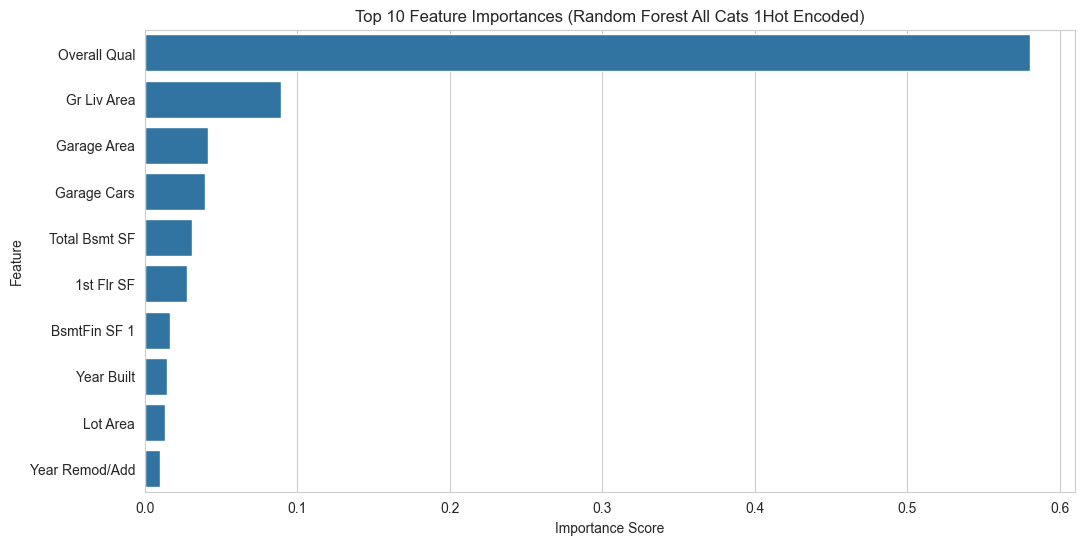


 GLOBAL: Linear Regression SHAP values:


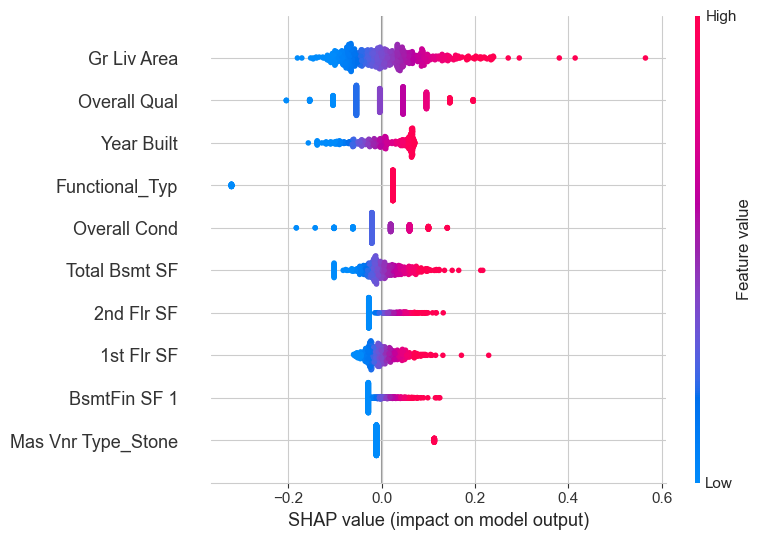


 GLOBAL: Randon Forest SHAP values:


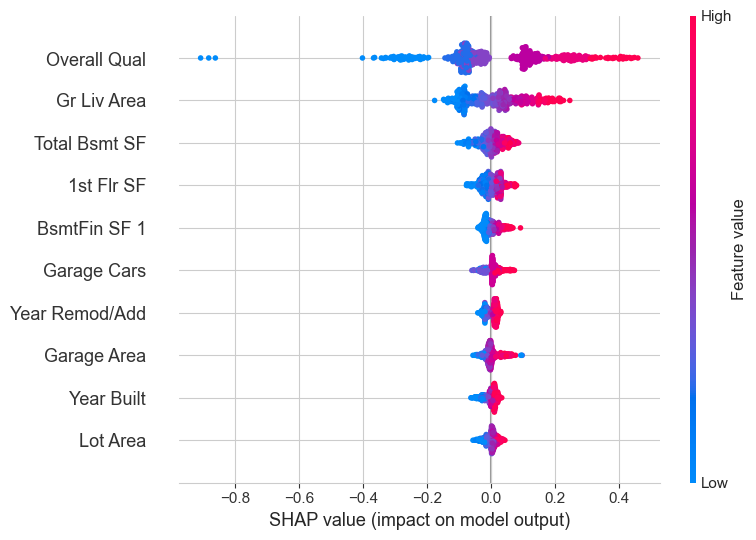


LOCAL PREDICTIONS: Synthetic Data:
+----+-------------------+-----------------------+----------------------+----------------------+
|    | Model             | Dataframe             |   Syn_Low_Nhood_Pred |   Syn_High_Hood_Pred |
|----+-------------------+-----------------------+----------------------+----------------------|
|  0 | Linear_Regression | All Cats 1Hot Encoded |               139717 |               165696 |
|  1 | Random_Forest     | All Cats 1Hot Encoded |               166081 |               166081 |
+----+-------------------+-----------------------+----------------------+----------------------+
Linear Progression:
Getting Shap Values - Row 0 - MeadowV


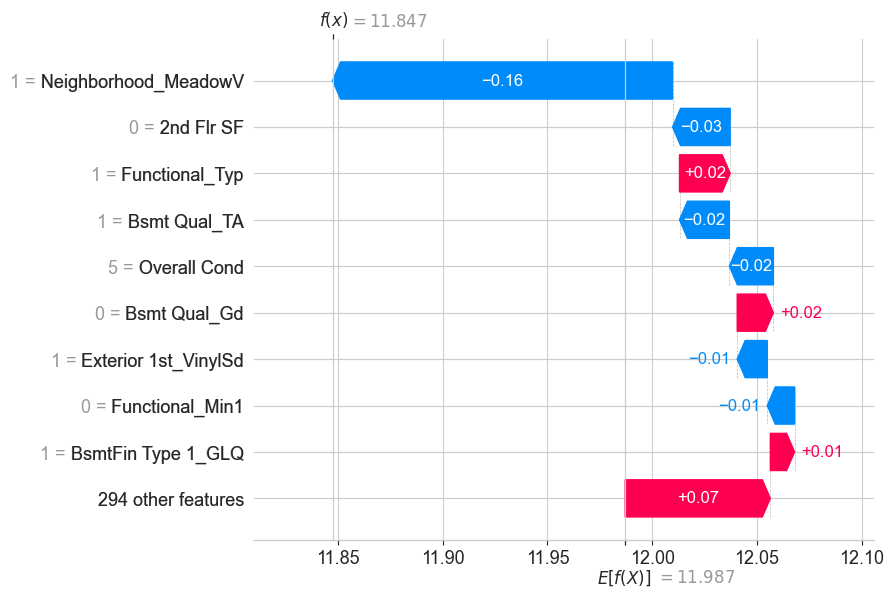

Getting Shap Values - Row 1 - NoRidge


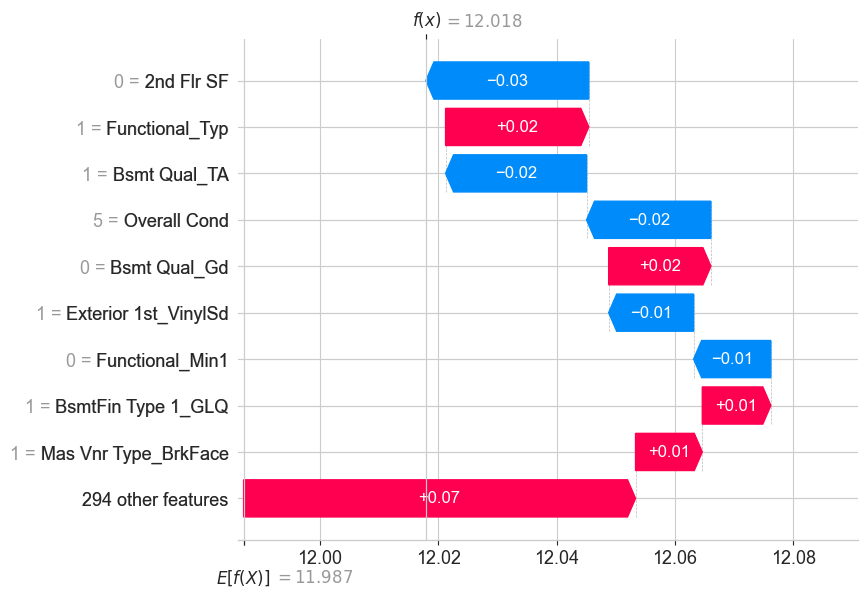

Random Forest:
Getting Shap Values - Row 0 - MeadowV


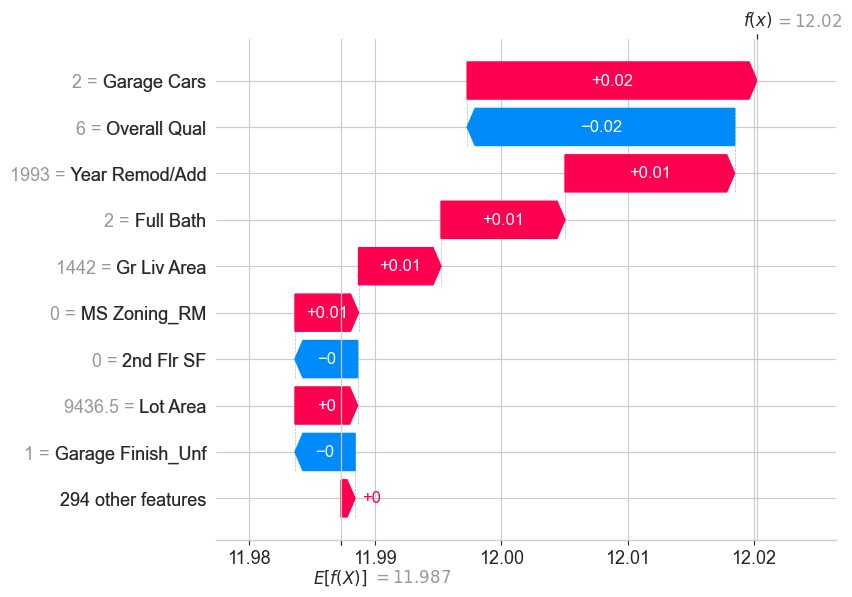

Getting Shap Values - Row 1 - NoRidge


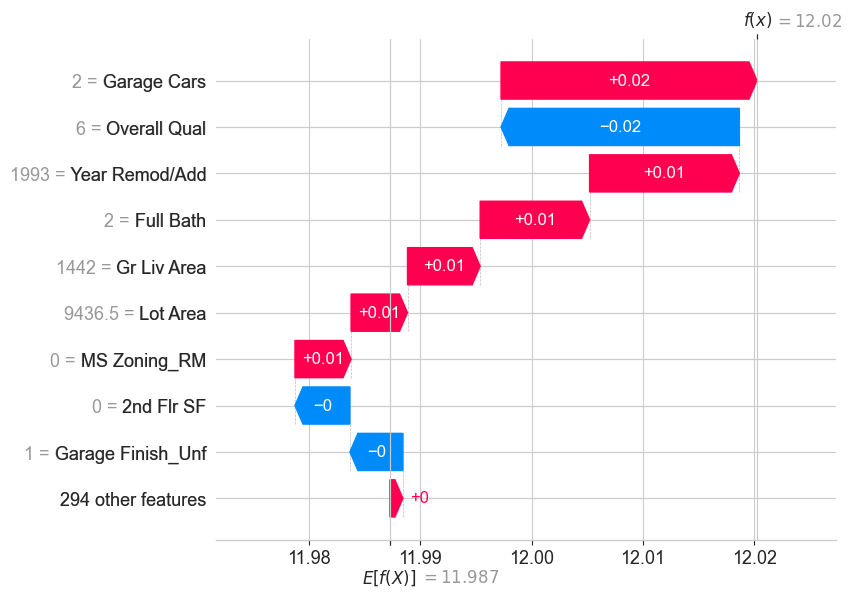

In [224]:
'''
"CodeBlock ONE_HOT_ENCODE_ALL_CATEGORICAL_VARIABLES"  

Using df=df_log_transformed.copy()
Created df_1_hot_encoded_all_cats

Vars: {}
'''

df=df_log_transformed.copy()
df_1_hot_encoded_all_cats = pd.get_dummies(df,dtype=float)

df_name='All Cats 1Hot Encoded'
project_datasets[df_name]=df_1_hot_encoded_all_cats
X_train, X_test, y_train, y_test, X_synth, y_synth=create_test_train_split(df_1_hot_encoded_all_cats)
one_hot_results=run_models_and_display(X_train, X_test, y_train, y_test, X_synth, y_synth, df_name)

combined_results.append(one_hot_results)


(2930, 279) (2, 279)
Working with dataframe ** ALL CATS CAT ENCODED ** :

Training and evaluating Linear_Regression...
Predicting with synthetic data using Linear_Regression...
Training and evaluating Random_Forest...
Predicting with synthetic data using Random_Forest...


 97%|=================== | 571/586 [00:21<00:00]       


 - Synthetic price = 160000

 - Synthetic Low Neighborhood avg price = 90000

 - Synthetic High Neighborhood avg price = 300000


GLOBAL: Model Results:
+----+-------------------+--------+--------+----------+----------------------+----------------------+----------------------+
|    | Model             |    MAE |   RMSE |       R² | Dataframe            |   Syn_Low_Nhood_Pred |   Syn_High_Hood_Pred |
|----+-------------------+--------+--------+----------+----------------------+----------------------+----------------------|
|  0 | Linear_Regression | 189992 | 212807 | 0.761866 | All cats CAT encoded |               160656 |               160385 |
|  1 | Random_Forest     | 185550 | 202018 | 0.914042 | All cats CAT encoded |               166153 |               166357 |
+----+-------------------+--------+--------+----------+----------------------+----------------------+----------------------+

 GLOBAL: Random Forest Feature Importance:
+----+----------------+--------------+
|    | Featur

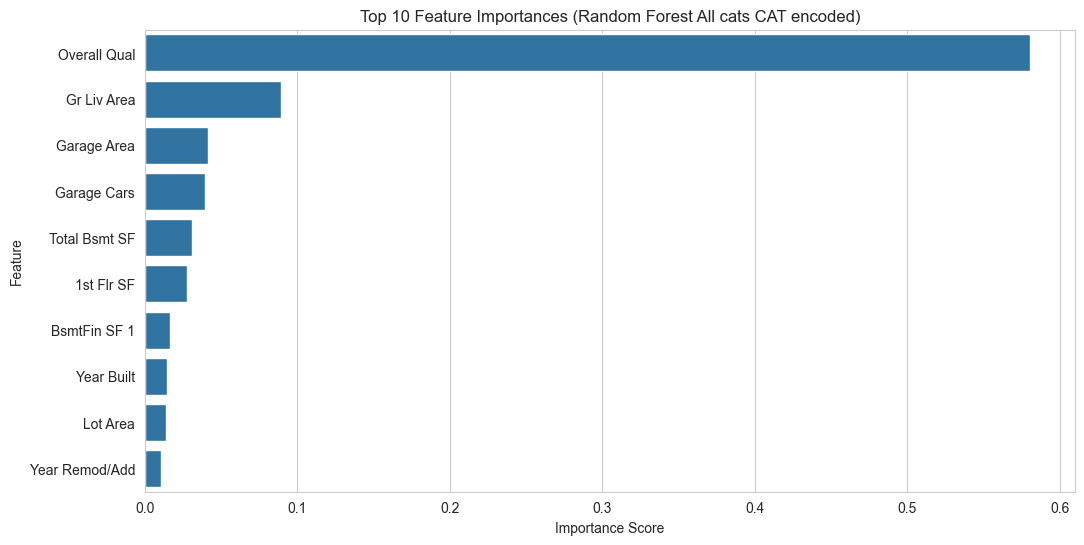


 GLOBAL: Linear Regression SHAP values:


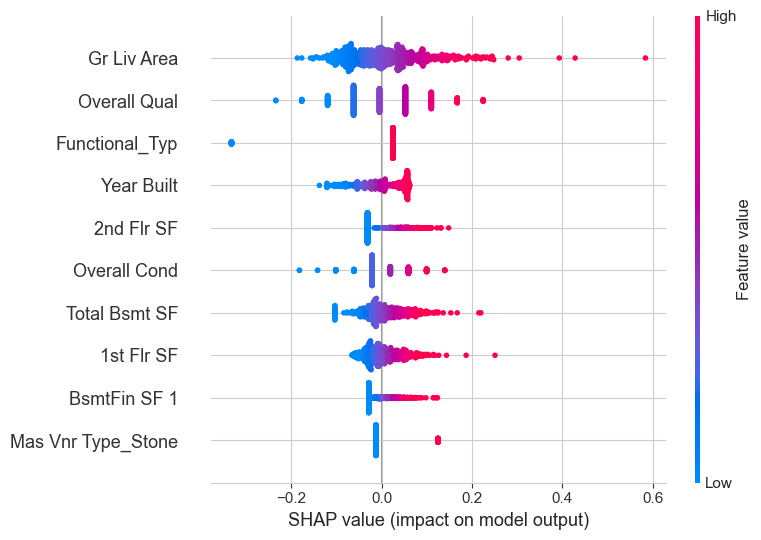


 GLOBAL: Randon Forest SHAP values:


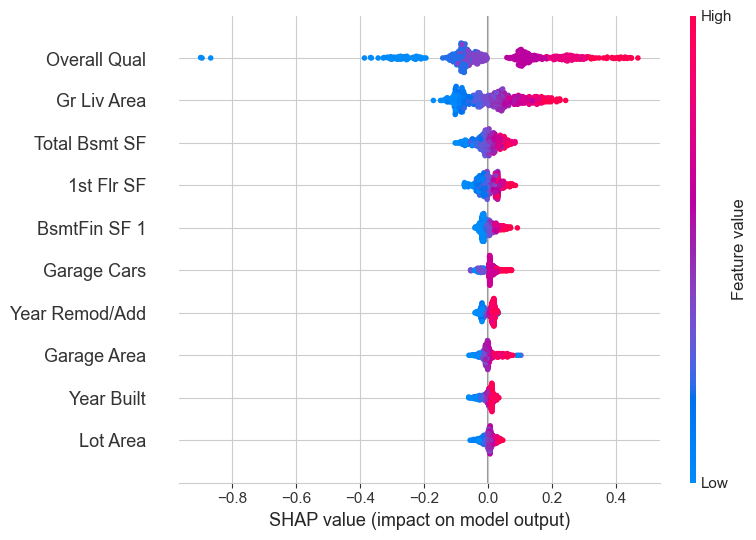


LOCAL PREDICTIONS: Synthetic Data:
+----+-------------------+----------------------+----------------------+----------------------+
|    | Model             | Dataframe            |   Syn_Low_Nhood_Pred |   Syn_High_Hood_Pred |
|----+-------------------+----------------------+----------------------+----------------------|
|  0 | Linear_Regression | All cats CAT encoded |               160656 |               160385 |
|  1 | Random_Forest     | All cats CAT encoded |               166153 |               166357 |
+----+-------------------+----------------------+----------------------+----------------------+
Linear Progression:
Getting Shap Values - Row 0 - MeadowV


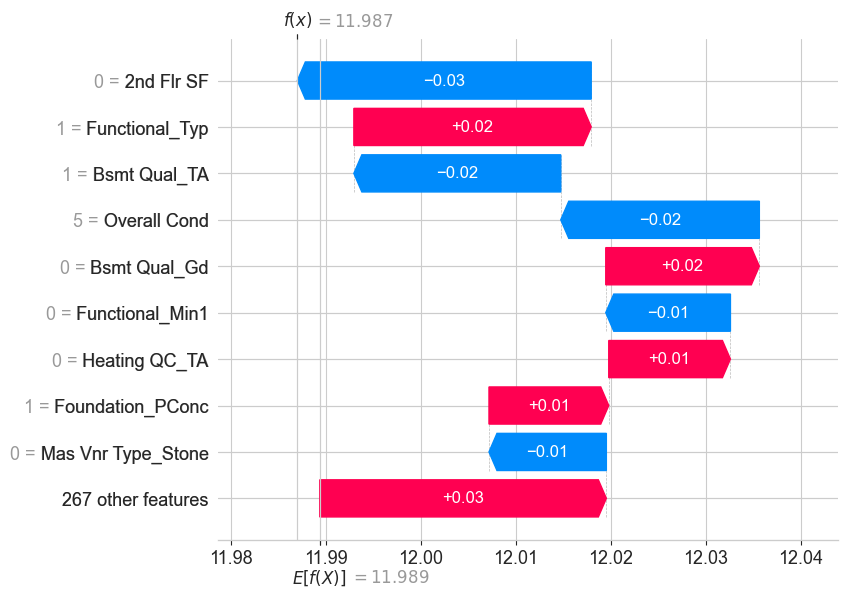

Getting Shap Values - Row 1 - NoRidge


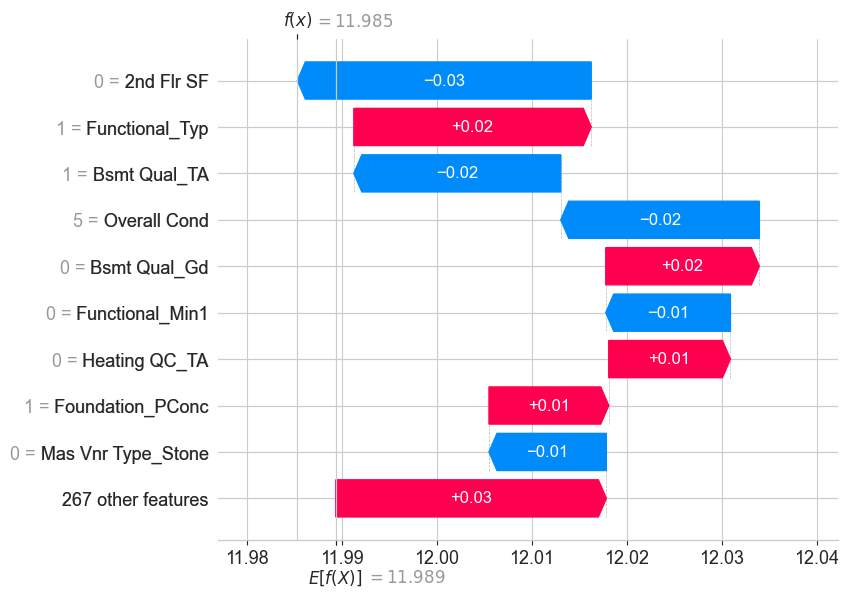

Random Forest:
Getting Shap Values - Row 0 - MeadowV


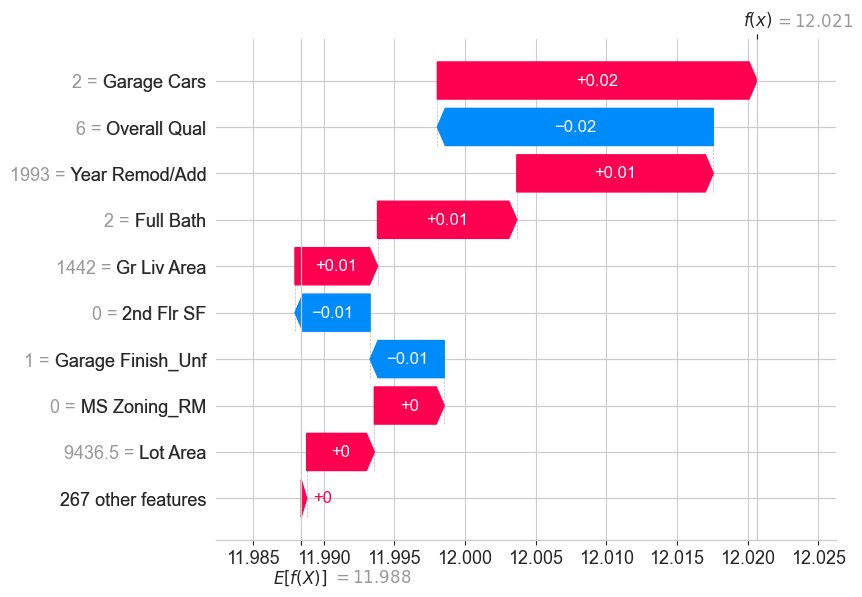

Getting Shap Values - Row 1 - NoRidge


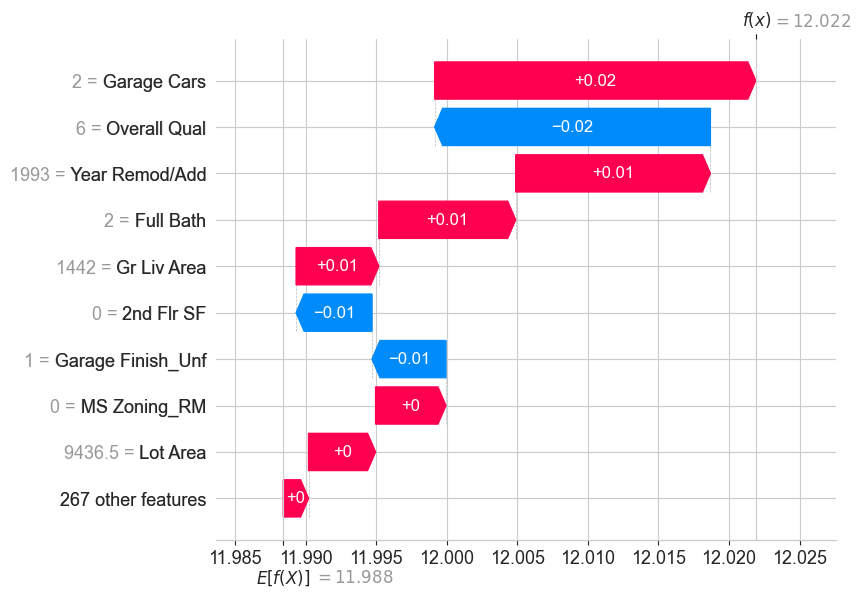

In [225]:
df=df_log_transformed.copy()

# Encode neighborhood as numeric
df['Neighborhood_Code'] = df['Neighborhood'].astype('category').cat.codes
df.drop(columns=['Neighborhood'], inplace=True)
df_all_cats_CAT_encoded = pd.get_dummies(df, dtype=float)
df_name='All cats CAT encoded'
project_datasets[df_name]=df_all_cats_CAT_encoded
X_train, X_test, y_train, y_test, X_synth, y_synth=create_test_train_split(df_all_cats_CAT_encoded)
cat_encoded_results=run_models_and_display(X_train, X_test, y_train, y_test, X_synth, y_synth, df_name)

combined_results.append(cat_encoded_results)

YOYOYO
               Model            MAE           RMSE        R²  \
0  Linear_Regression  190077.196783  212164.403149  0.815747   
1      Random_Forest  185389.543222  201970.566724  0.908850   
2  Linear_Regression  189991.575312  212807.041119  0.761866   
3      Random_Forest  185549.837345  202018.119437  0.914042   
4  Linear_Regression  189649.063181  211699.811903  0.811670   
5      Random_Forest  185496.562680  202095.479322  0.914256   

                        Dataframe  Syn_Low_Nhood_Pred  Syn_High_Hood_Pred  
0           All Cats 1Hot Encoded           139717.12           165696.24  
1           All Cats 1Hot Encoded           166081.20           166081.20  
2            All cats CAT encoded           160656.14           160385.49  
3            All cats CAT encoded           166152.55           166356.81  
4  Neighborhood - Target Encoding           154174.44           171915.42  
5  Neighborhood - Target Encoding           151269.68           177319.38  


✅ Understanding the Setup:

In target encoding, only the feature data (X_train and X_test) is encoded.
The target (y_train, y_test) is never transformed — it’s used only to teach the encoder during training.

🧠 Why y_test Is Not Encoded:

    The target (y_test) is what you’re trying to predict

    You never encode or transform it — you just compare predictions to it after the model runs


from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error


import numpy as np

# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# 2. Target encode X (not y!)
encoder = TargetEncoder(cols=["Neighborhood"])
X_train_enc = encoder.fit_transform(X_train, y_train)
X_test_enc = encoder.transform(X_test)

# 3. Fit a model
model = RandomForestRegressor()
model.fit(X_train_enc, y_train)

# 4. Predict and compare to raw y_test
y_pred = model.predict(X_test_enc)

# 5. Evaluate
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: ${mae:,.2f}")

TL;DR

Element	Encoded?	Why?

X_train	✅ Yes	Input features for training

X_test	✅ Yes	Input features for prediction

y_train	❌ No	Used as target to learn encoding

y_test	❌ No	Ground truth to evaluate model

(2930, 279) (2, 279)
TARGET ENCODING
Working with dataframe ** NEIGHBORHOOD - TARGET ENCODING ** :

Training and evaluating Linear_Regression...
Predicting with synthetic data using Linear_Regression...
Training and evaluating Random_Forest...
Predicting with synthetic data using Random_Forest...


 96%|=================== | 562/586 [00:22<00:00]       


 - Synthetic price = 160000

 - Synthetic Low Neighborhood avg price = 90000

 - Synthetic High Neighborhood avg price = 300000


GLOBAL: Model Results:
+----+-------------------+--------+--------+----------+--------------------------------+----------------------+----------------------+
|    | Model             |    MAE |   RMSE |       R² | Dataframe                      |   Syn_Low_Nhood_Pred |   Syn_High_Hood_Pred |
|----+-------------------+--------+--------+----------+--------------------------------+----------------------+----------------------|
|  0 | Linear_Regression | 189649 | 211700 | 0.81167  | Neighborhood - Target Encoding |               154174 |               171915 |
|  1 | Random_Forest     | 185497 | 202095 | 0.914256 | Neighborhood - Target Encoding |               151270 |               177319 |
+----+-------------------+--------+--------+----------+--------------------------------+----------------------+----------------------+

 GLOBAL: Random Forest Feature Impo

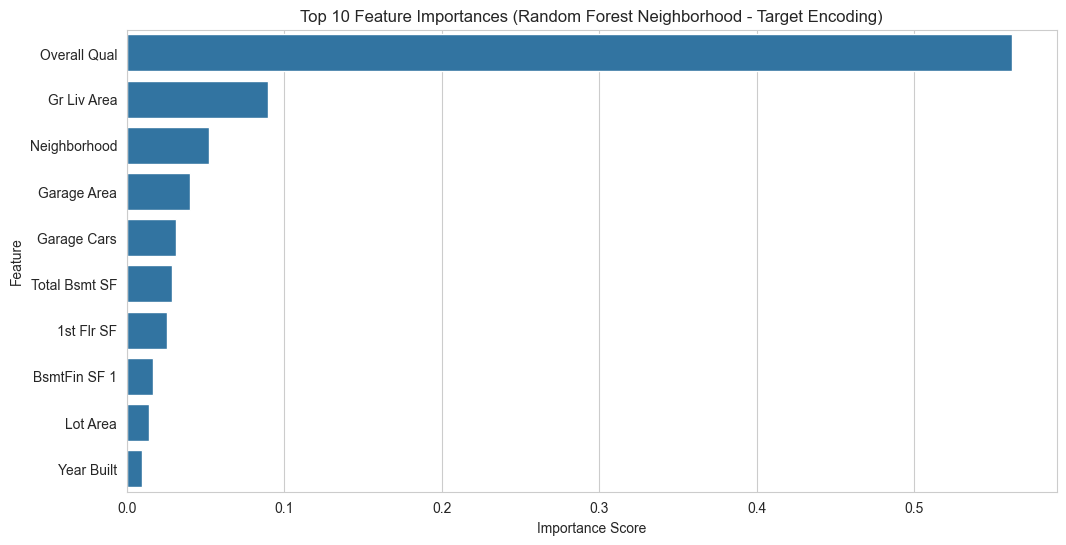


 GLOBAL: Linear Regression SHAP values:


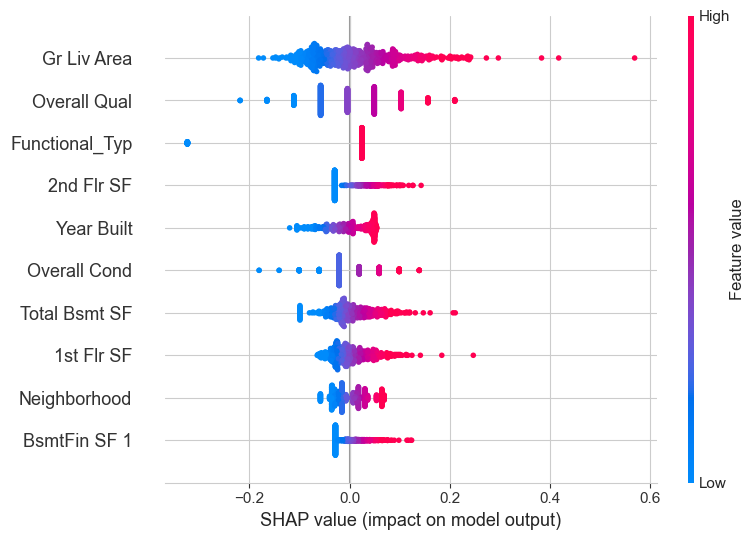


 GLOBAL: Randon Forest SHAP values:


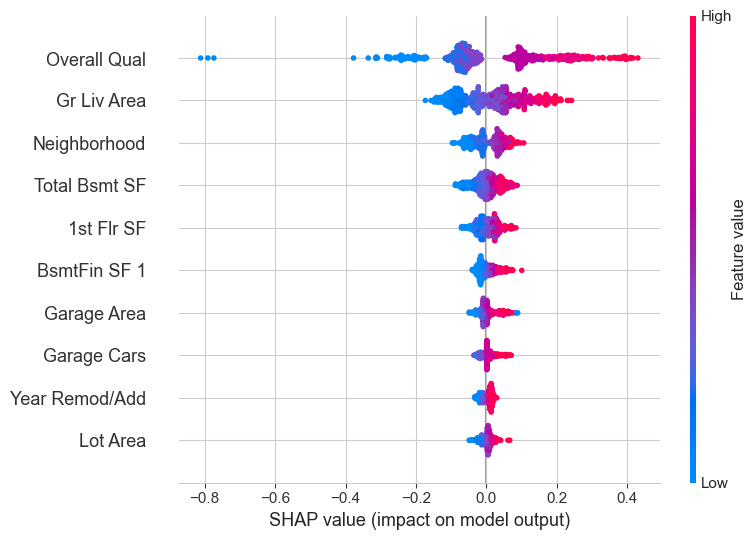


LOCAL PREDICTIONS: Synthetic Data:
+----+-------------------+--------------------------------+----------------------+----------------------+
|    | Model             | Dataframe                      |   Syn_Low_Nhood_Pred |   Syn_High_Hood_Pred |
|----+-------------------+--------------------------------+----------------------+----------------------|
|  0 | Linear_Regression | Neighborhood - Target Encoding |               154174 |               171915 |
|  1 | Random_Forest     | Neighborhood - Target Encoding |               151270 |               177319 |
+----+-------------------+--------------------------------+----------------------+----------------------+
Linear Progression:
Getting Shap Values - Row 0 - MeadowV


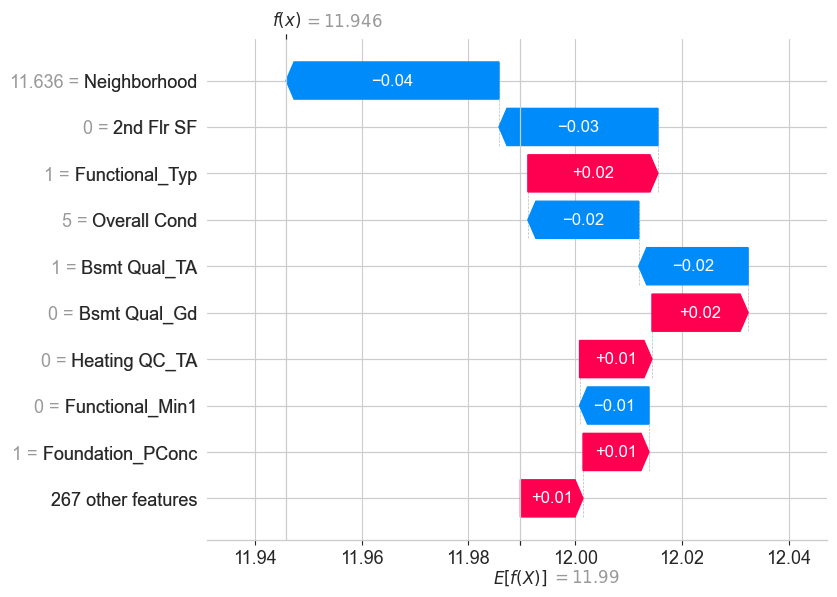

Getting Shap Values - Row 1 - NoRidge


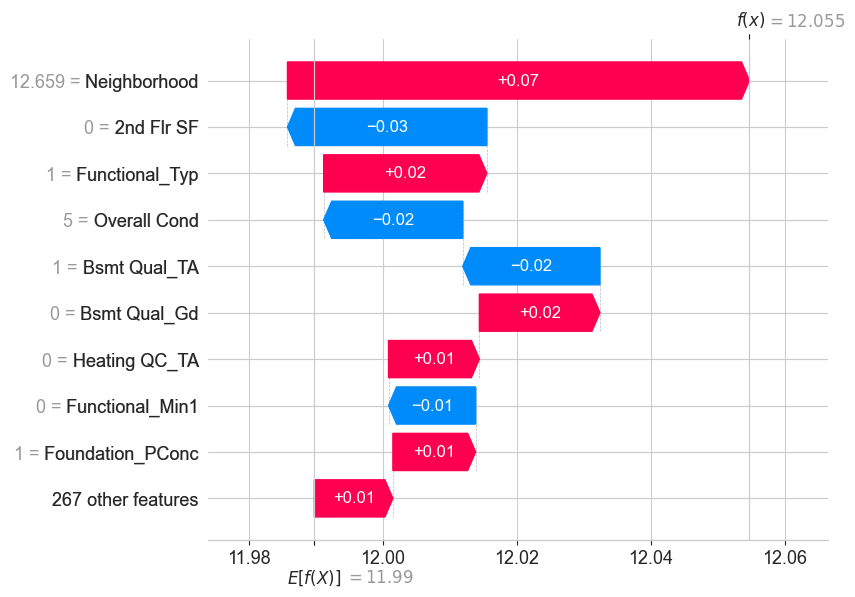

Random Forest:
Getting Shap Values - Row 0 - MeadowV


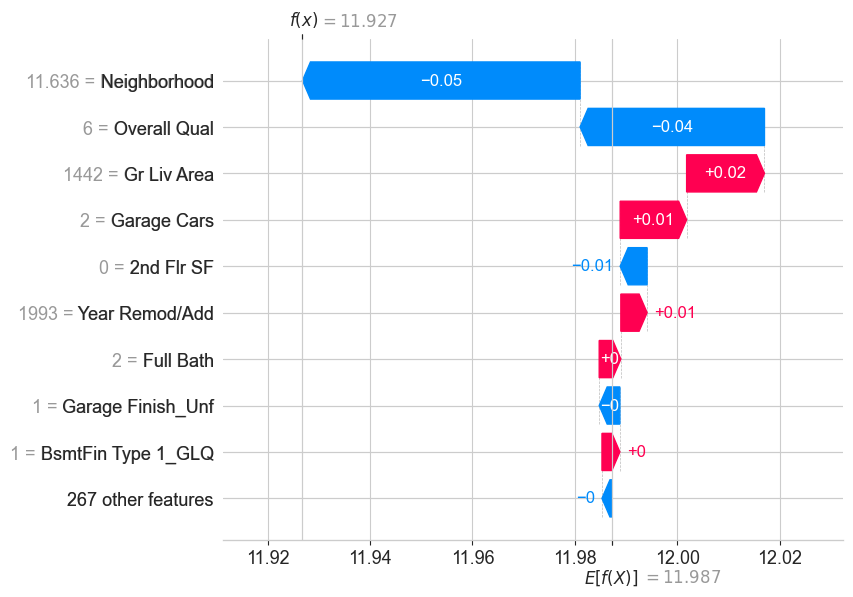

Getting Shap Values - Row 1 - NoRidge


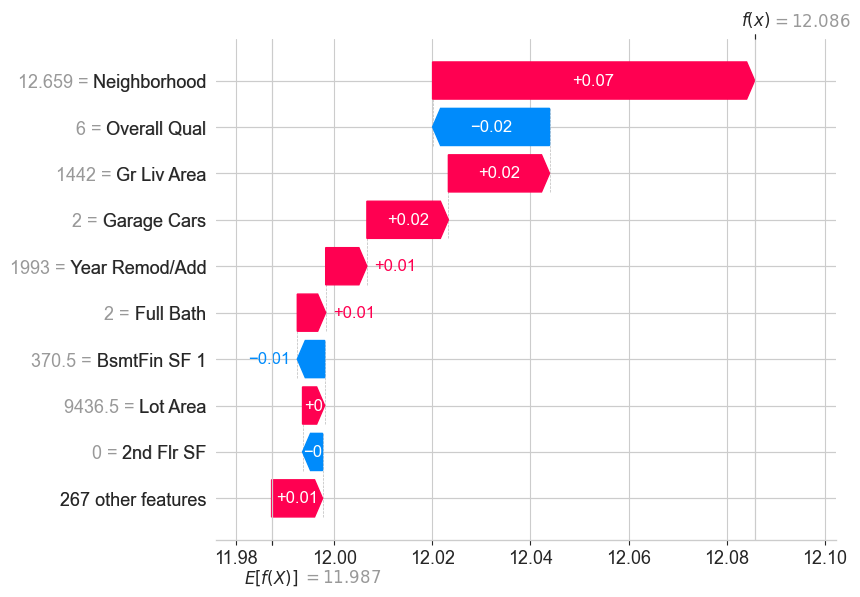

In [226]:
from category_encoders import *
df=df_log_transformed.copy()

# Identify categorical features
categorical_cols = categorical_column_names.copy()
categorical_cols.remove("Neighborhood")
df_cat_encoded_for_target_encoding = pd.get_dummies(df, columns=categorical_cols, dtype=float)
# Neighborhood intact and will be coded separately for target encoding
df_name='Neighborhood - Target Encoding'
project_datasets[df_name]=df_cat_encoded_for_target_encoding

X_train, X_test, y_train, y_test, X_synth, y_synth=create_test_train_split(df_cat_encoded_for_target_encoding)


print('TARGET ENCODING')
encoder = TargetEncoder(cols=["Neighborhood"])
# 2. Target encode X (not y!)
X_train_enc = encoder.fit_transform(X_train, y_train)
X_test_enc = encoder.transform(X_test)
X_synth_enc = encoder.transform(X_synth)
target_encode_results=run_models_and_display(X_train_enc,X_test_enc, y_train, y_test, X_synth_enc, y_synth, df_name)
combined_results.append(target_encode_results)

In [227]:
from tabulate import tabulate

# Combine both results into a single table
comparison_df = pd.concat(combined_results, ignore_index=True)


print(tabulate(comparison_df.head(10), headers='keys', tablefmt='psql'))


+----+-------------------+--------+--------+----------+--------------------------------+----------------------+----------------------+
|    | Model             |    MAE |   RMSE |       R² | Dataframe                      |   Syn_Low_Nhood_Pred |   Syn_High_Hood_Pred |
|----+-------------------+--------+--------+----------+--------------------------------+----------------------+----------------------|
|  0 | Linear_Regression | 190077 | 212164 | 0.815747 | All Cats 1Hot Encoded          |               139717 |               165696 |
|  1 | Random_Forest     | 185390 | 201971 | 0.90885  | All Cats 1Hot Encoded          |               166081 |               166081 |
|  2 | Linear_Regression | 189992 | 212807 | 0.761866 | All cats CAT encoded           |               160656 |               160385 |
|  3 | Random_Forest     | 185550 | 202018 | 0.914042 | All cats CAT encoded           |               166153 |               166357 |
|  4 | Linear_Regression | 189649 | 211700 | 0.81167  |